In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from itertools import cycle
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [4]:
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

### DVSCAN api 参数
#### 说明
只要样本点的密度大于某个阈值，则将该样本添加都最近的簇中

#### 参数
- eps: 半径，两个样本之间的最大距离，距离小于这个值，则认为一个样本在另一个样本的领域内，不是集群内点的距离的最大约束。
- min_samples: 样本密度，在一个核心点的领域内的样本的数量，包括其本身。
- metric: 度量指标
- metric_params: 度量函数附件的关键字参数
- algorithm: {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’},由NearesteNighbors模块计算点的距离，并找到最近邻居的算法
- leaf_size: 传递给 BallTree 和 cKDTree 的叶子节点数，其影响了树的查询和构建速度，以及需要内存来存储树。
- p: 用老计算两点之间的距离的闵可夫斯基的幂
- n_jobs: 运行的线程数量

#### 属性
- core_sample_indices_: 核心样本的指数
- components_ : 训练找到的样本的其他核心点
- labels_：数据集每个簇的标签，噪音点为 -1

#### 方法


### API基础用法
#### 生成模拟数据

In [5]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, Y = datasets.make_blobs(
    n_samples=750, centers=centers, cluster_std=.4, random_state=0)
X = StandardScaler().fit_transform(X)    # 数据标准化

#### 模型构建、训练

In [7]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X)

# 查看簇标签，集簇数量，
labels = dbscan.labels_
n_clustes = np.unique(labels).size - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)    # 噪音点数量

print('集群估计数量：', n_clustes)
print('估计的噪音点数量：', n_noise)

集群估计数量： 3
估计的噪音点数量： 18


#### 画图

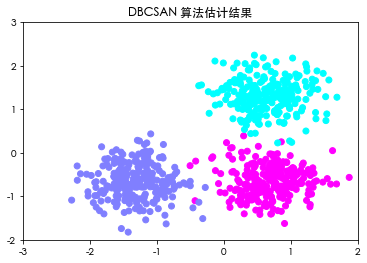

In [8]:
plt.figure(facecolor='w')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='cool')
plt.title('DBCSAN 算法估计结果')
plt.xlim([-3, 2])
plt.ylim([-2, 3])
plt.show()

### 同时传入多个参数进行比较
#### 创建模拟数据集

In [9]:
N = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
X, Y = datasets.make_blobs(n_samples=N, n_features=2, centers=centers, 
                            cluster_std=[1, 0.75, 0.5, 0.25], random_state=9)

X = StandardScaler().fit_transform(X)    # 标准化
# 构建参数
params = ((0.15, 5), (0.2, 10), (0.2, 15), (0.3, 5), (0.3, 10), (0.3, 15))

#### 构建模型并画图

聚类簇数：14，噪音点数：198
聚类簇数：5，噪音点数：259
聚类簇数：6，噪音点数：385
聚类簇数：3，噪音点数：23
聚类簇数：1，噪音点数：77
聚类簇数：2，噪音点数：127


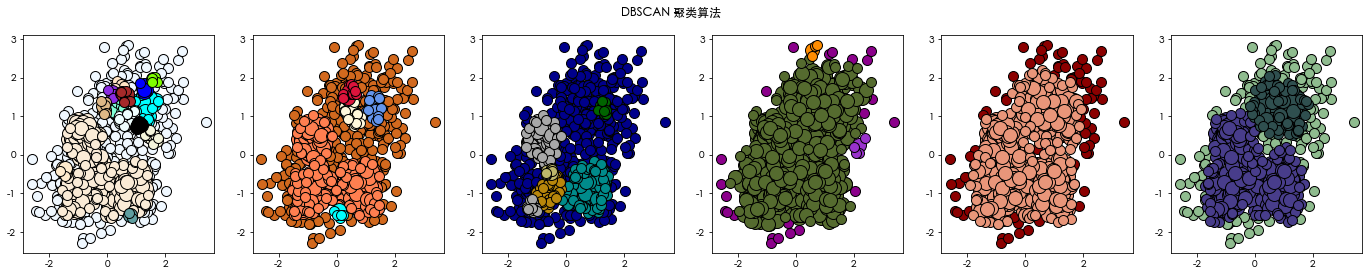

In [24]:
colors_ = cycle(colors.cnames.keys())

plt.figure(facecolor='w', figsize=(24, 4))
plt.suptitle('DBSCAN 聚类算法')
plot_num = 1

for param in params:
    dbscan = DBSCAN(eps=param[0], min_samples=param[1])
    dbscan.fit(X)

    # 估计结果标签
    labels = dbscan.labels_
    # 结果簇数量
    n_cluster = np.unique(labels).size - (1 if -1 in labels else 0)
    # 噪音点数量
    n_noise = list(labels).count(-1)
    strs = f'聚类簇数：{n_cluster}，噪音点数：{n_noise}'
    print(strs)

    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    plt.subplot(1, 6, plot_num)
    for k, col in zip(np.unique(labels), colors_):
        if k == '-1':
            col = 'k'   # 将噪音点设为黑色

        class_member_mask = labels == k
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)

#     plt.subplot(1, 6, plot_num)
#     plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cool', label=strs)
#     plt.legend()

    plot_num += 1
plt.show()

In [20]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True